Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8436 - loss: 0.4630 - val_accuracy: 0.9609 - val_loss: 0.1375
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9753 - loss: 0.1189 - val_accuracy: 0.9859 - val_loss: 0.0906
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9803 - loss: 0.0994 - val_accuracy: 0.9875 - val_loss: 0.0707
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9833 - loss: 0.0683 - val_accuracy: 0.9765 - val_loss: 0.0617
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9852 - loss: 0.0483 - val_accuracy: 0.9859 - val_loss: 0.0436
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9846 - loss: 0.0442 - val_accuracy: 0.9953 - val_loss: 0.0329
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9851 - loss: 0.0408 - val_accuracy: 0.9969 - val_loss: 0.0296
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9890 - loss: 0.0285 - val_accuracy: 0.

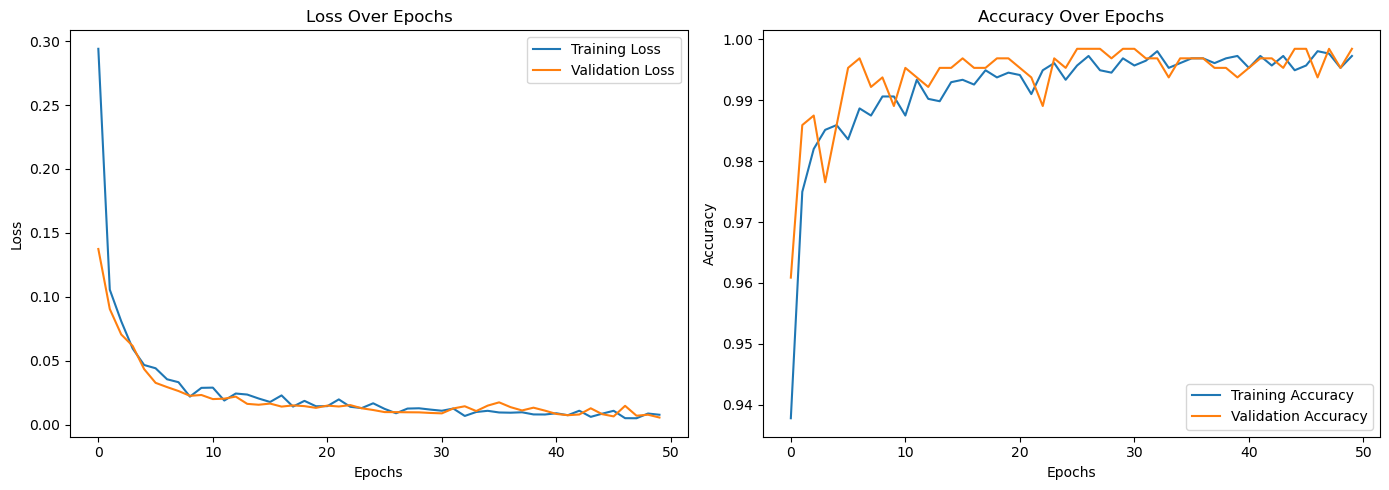

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 加載數據
file_path = 'cleaned_data2.0.csv'  # 確保文件路徑正確
data = pd.read_csv(file_path)

# 將 'Status' 編碼為 0（Normal）和 1（Fatigue）
data['Fatigue'] = data['Status'].apply(lambda status: 0 if status.strip().lower() == 'normal' else 1)

# 準備特徵（Signal 和 BPM）和目標（Fatigue）
X = data[['Signal', 'BPM']].values
y = data['Fatigue'].values

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化數據
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立模型
model = Sequential([
    Input(shape=(2,)),                       # 明確定義輸入形狀為 2
    Dense(64, activation='relu'),            # 第一層
    Dropout(0.3),                            # Dropout 層
    Dense(32, activation='relu'),            # 第二層
    Dense(1, activation='sigmoid')           # 輸出層
])

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=16, verbose=1)

# 評估模型
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n測試集準確率：{accuracy:.2f}")

# 預測並打印分類報告
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int).flatten()
print("\n分類報告：")
print(classification_report(y_test, y_pred))

# 可視化訓練過程
plt.figure(figsize=(14, 5))

# 損失函數圖
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 準確率圖
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

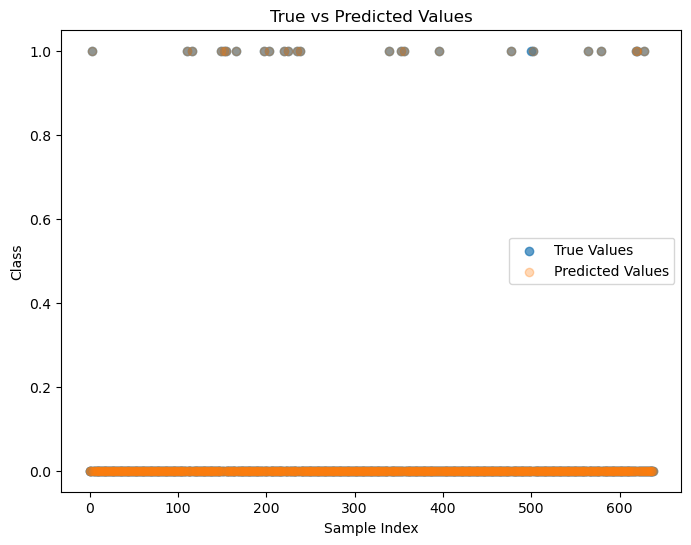

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='True Values', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', alpha=0.3)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

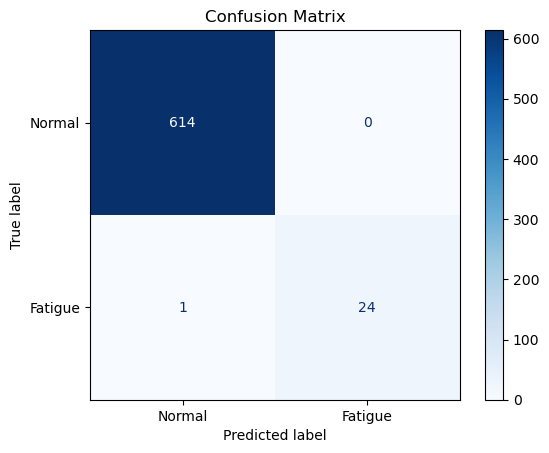

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Fatigue'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [21]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=16, callbacks=[reduce_lr])


Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0074 - val_accuracy: 0.9969 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9964 - loss: 0.0086 - val_accuracy: 0.9984 - val_loss: 0.0056 - learning_rate: 0.0010
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9961 - loss: 0.0097 - val_accuracy: 0.9969 - val_loss: 0.0059 - learning_rate: 0.0010
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9976 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0047 - learning_rate: 0.0010
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9967 - loss: 0.0064 - val_accuracy: 0.9984 - val_loss: 0.0056 - learning_rate: 0.0010
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9966 - loss: 0.0055 - val_accuracy: 0.9984 - val_loss: 0.0058 - learning_rate: 0.0010
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9976 - loss: 0.0073 - 

In [25]:
from tensorflow.keras.models import load_model

# 保存模型為 .keras 格式
model.save('fatigue_prediction_model.keras')  # 保存為新的格式

# 加載模型
loaded_model = load_model('fatigue_prediction_model.keras')

# 進行推斷
y_pred = loaded_model.predict(X_test_scaled)

# 如需重新訓練或評估，需重新編譯
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 評估模型
loss, accuracy = loaded_model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"測試損失: {loss}, 測試準確率: {accuracy}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\User\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0025      
測試損失: 0.0036091927904635668, 測試準確率: 1.0


In [41]:
# 新數據
new_data = [[520, 75], [510, 90],[550,120]]  # Signal 和 BPM 的數據點

# 標準化數據
new_data_scaled = scaler.transform(new_data)

# 使用模型進行推斷
predictions = loaded_model.predict(new_data_scaled)
predicted_classes = (predictions > 0.5).astype(int)

# 輸出結果
for i, pred in enumerate(predicted_classes):
    status = 'Fatigue' if pred == 1 else 'Normal'
    print(f"樣本 {i+1} 預測結果：{status}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
樣本 1 預測結果：Normal
樣本 2 預測結果：Normal
樣本 3 預測結果：Fatigue
